In [ ]:
# The code below produces a plot of the Continuous Dual Hahn Poisson flow as described in the paper:
# "Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
# The program reads the file with pre-computed coefficients and produces an implicit plot, 
# i.e. it visualises the flow of the real roots when r varies. 
# Version 1.0, June 1, 2024. 

Automated checks:
The sum of all the coefficients is   : 0.5000000000000000 = Xi(0.5i) = 0.5000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : 11.580897 versus formula: 11.588442 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


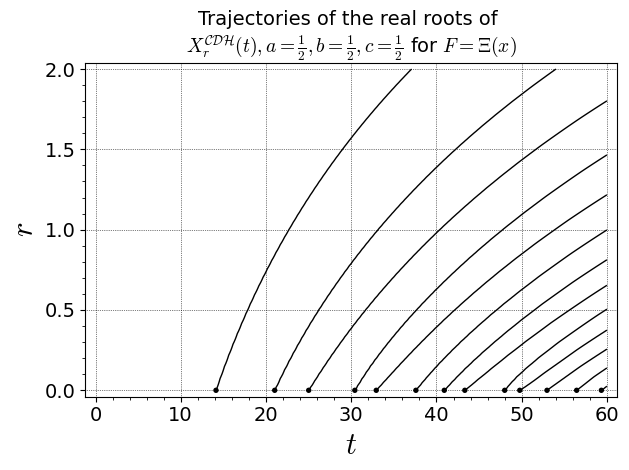

In [11]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("ContDualHahnCoeffa12b12c12", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(x,a,b,c,n):
    f1=CCF(a,0)+I*CCF(x);f2=CCF(a,0)-I*CCF(x)
    hyp=CCF(1).hypergeometric([-n,f1,f2],[a+b,a+c])
    return hyp

def ContDualHahnFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("0.5"),CCF("0.5"),CCF("0.5"),n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (ContDualHahnFlow(x0 + tr*100,tr) - ContDualHahnFlow(x0,tr))/(tr*100)
        h = ContDualHahnFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

def B(x,a,b,c):
    return (a-I*x)*(b-I*x)*(c-I*x)/(2*I*x*(2*I*x-1))

def D(x,a,b,c):
    return (a+I*x)*(b+I*x)*(c+I*x)/(2*I*x*(2*I*x+1))

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return B(ordrho[k-1],0.5,0.5,0.5)*prodzeros(k,I) + D(ordrho[k-1],0.5,0.5,0.5)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0.5i) = %3.16f (should be equal)." % (CoeffSum, ContDualHahnFlow(0.5*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyDDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(ContDualHahnFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(ContDualHahnFlow(t,r)))),(t,0,60),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{CDH}}_r(t), a=\frac{1}{2}, b=\frac{1}{2}, c=\frac{1}{2}$ for $F=\Xi(x)$',gridlines=True,plot_points=120)
show(a1 + z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 2010288.7159228122327477 = Xi(30i) = 2010288.7155300306621939 (should be equal).
d/dr z_3(0) via Newton approximation : -22.403460 versus formula: -22.454298 (should be close).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


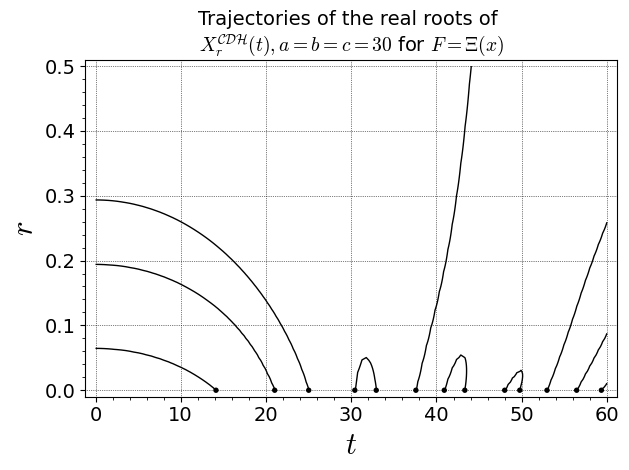

In [27]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("ContDualHahnCoeffa30b30c30", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(x,a,b,c,n):
    f1=CCF(a,0)+I*CCF(x);f2=CCF(a,0)-I*CCF(x)
    hyp=CCF(1).hypergeometric([-n,f1,f2],[a+b,a+c])
    return hyp

def ContDualHahnFlow(t,r):
    sum=CCF(0)
    for n in range(171):
        h = 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("30"),CCF("30"),CCF("30"),n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (ContDualHahnFlow(x0 + tr*100,tr) - ContDualHahnFlow(x0,tr))/(tr*100)
        h = ContDualHahnFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

def B(x,a,b,c):
    return (a-I*x)*(b-I*x)*(c-I*x)/(2*I*x*(2*I*x-1))

def D(x,a,b,c):
    return (a+I*x)*(b+I*x)*(c+I*x)/(2*I*x*(2*I*x+1))

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return B(ordrho[k-1],30,30,30)*prodzeros(k,I) + D(ordrho[k-1],30,30,30)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(30i) = %3.16f (should be equal)." % (CoeffSum, ContDualHahnFlow(30*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyDDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(ContDualHahnFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(ContDualHahnFlow(t,r)))),(t,0,60),(r,0,0.5),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{CDH}}_r(t), a=b=c=30$ for $F=\Xi(x)$',gridlines=True,plot_points=120)
show(a1 + z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 4.3135640236812538 = Xi(10i) = 4.3135640236812538 (should be equal).
d/dr z_3(0) via Newton approximation : 14.588035 versus formula: 14.578211 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).


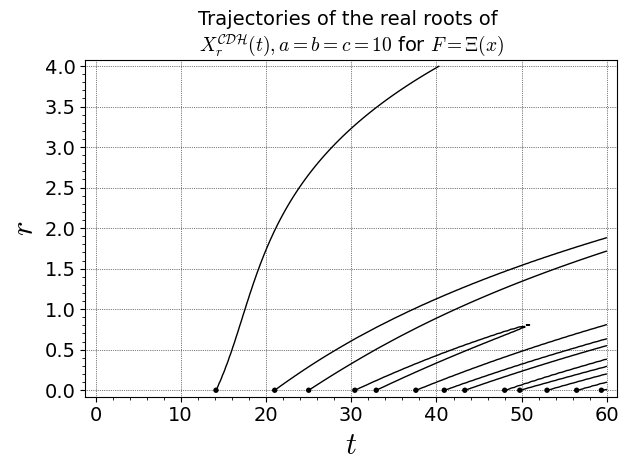

In [57]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("ContDualHahnCoeffa10b10c10", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(x,a,b,c,n):
    f1=CCF(a,0)+I*CCF(x);f2=CCF(a,0)-I*CCF(x)
    hyp=CCF(1).hypergeometric([-n,f1,f2],[a+b,a+c])
    return hyp

def ContDualHahnFlow(t,r):
    sum=CCF(0)
    for n in range(100):
        h = 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("10"),CCF("10"),CCF("10"),n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (ContDualHahnFlow(x0 + tr*100,tr) - ContDualHahnFlow(x0,tr))/(tr*100)
        h = ContDualHahnFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

def B(x,a,b,c):
    return (a-I*x)*(b-I*x)*(c-I*x)/(2*I*x*(2*I*x-1))

def D(x,a,b,c):
    return (a+I*x)*(b+I*x)*(c+I*x)/(2*I*x*(2*I*x+1))

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return B(ordrho[k-1],10,10,10)*prodzeros(k,I) + D(ordrho[k-1],10,10,10)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(10i) = %3.16f (should be equal)." % (CoeffSum, ContDualHahnFlow(10*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyDDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(ContDualHahnFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(ContDualHahnFlow(t,r)))),(t,0,60),(r,0,4),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{CDH}}_r(t), a=b=c=10$ for $F=\Xi(x)$',gridlines=True,plot_points=150)
show(a1 + z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.6111280074951507 = Xi(3i) = 0.6111280074951507 (should be equal).
d/dr z_3(0) via Newton approximation : 13.423302 versus formula: 13.426785 (should be close).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


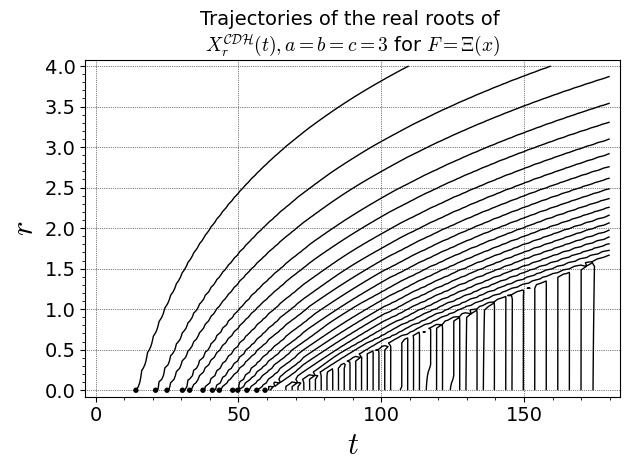

In [56]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("ContDualHahnCoeffa3b3c3", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(x,a,b,c,n):
    f1=CCF(a,0)+I*CCF(x);f2=CCF(a,0)-I*CCF(x)
    hyp=CCF(1).hypergeometric([-n,f1,f2],[a+b,a+c])
    return hyp

def ContDualHahnFlow(t,r):
    sum=CCF(0)
    for n in range(102):
        h = 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("3"),CCF("3"),CCF("3"),n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (ContDualHahnFlow(x0 + tr*100,tr) - ContDualHahnFlow(x0,tr))/(tr*100)
        h = ContDualHahnFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

def B(x,a,b,c):
    return (a-I*x)*(b-I*x)*(c-I*x)/(2*I*x*(2*I*x-1))

def D(x,a,b,c):
    return (a+I*x)*(b+I*x)*(c+I*x)/(2*I*x*(2*I*x+1))

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return B(ordrho[k-1],3,3,3)*prodzeros(k,I) + D(ordrho[k-1],3,3,3)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(3i) = %3.16f (should be equal)." % (CoeffSum, ContDualHahnFlow(3*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyDDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(ContDualHahnFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(ContDualHahnFlow(t,r)))),(t,0,180),(r,0,4),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{CDH}}_r(t), a=b=c=3$ for $F=\Xi(x)$',gridlines=True,plot_points=90)
show(a1 + z,aspect_ratio='automatic')

In [16]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("ContDualHahnCoeffa12b12c12", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(x,a,b,c,n):
    f1=CCF(a,0)+I*CCF(x);f2=CCF(a,0)-I*CCF(x)
    hyp=CCF(1).hypergeometric([-n,f1,f2],[a+b,a+c])
    return hyp

def ContDualHahnFlow(t,r):
    sum=CCF(0)
    for n in range(200):
        h = 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("0.5"),CCF("0.5"),CCF("0.5"),n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (ContDualHahnFlow(x0 + tr*100,tr) - ContDualHahnFlow(x0,tr))/(tr*100)
        h = ContDualHahnFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

def B(x,a,b,c):
    return (a-I*x)*(b-I*x)*(c-I*x)/(2*I*x*(2*I*x-1))

def D(x,a,b,c):
    return (a+I*x)*(b+I*x)*(c+I*x)/(2*I*x*(2*I*x+1))

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return B(ordrho[k-1],0.5,0.5,0.5)*prodzeros(k,I) + D(ordrho[k-1],0.5,0.5,0.5)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0.5i) = %3.16f (should be equal)." % (CoeffSum, ContDualHahnFlow(0.5*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyDDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(ContDualHahnFlow(60,0)-Xi(60)))

print(prodzeros(3,I))
print(prodzeros(3,-I))
#a1=implicit_plot(lambda t,r:((RDF(ContDualHahnFlow(t,r)))),(t,0,60),(r,-0.4,0.4),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{CDH}}_r(t), a=\frac{1}{2}, b=\frac{1}{2}, c=\frac{1}{2}$ for $F=\Xi(x)$',gridlines=True,plot_points=120)
#show(a1 + z,aspect_ratio='automatic')

Automated checks:
The sum of all the coefficients is   : 0.5000000000000000 = Xi(0.5i) = 0.5000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : 11.580897 versus formula: 11.588442 (should be close).
Ensure 20 digits accuracy at t = 60  : -0.00000000000000000000 (should show 20 zeros).
0.6005997251630333 + 0.9030202558097574*I
0.6005997251630333 - 0.9030202558097574*I


In [ ]:
0.7292115472981131 + 0.7839911089230854*I
0.7292115472981131 - 0.7839911089230854*I

Automated checks:
The sum of all the coefficients is   : 1.0104492672326733 = Xin(0.5i) = 1.0104492672326733 (should be equal).
d/dr z_3(0) via Newton approximation : 9.815523 versus formula: 9.815523 (should be equal).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


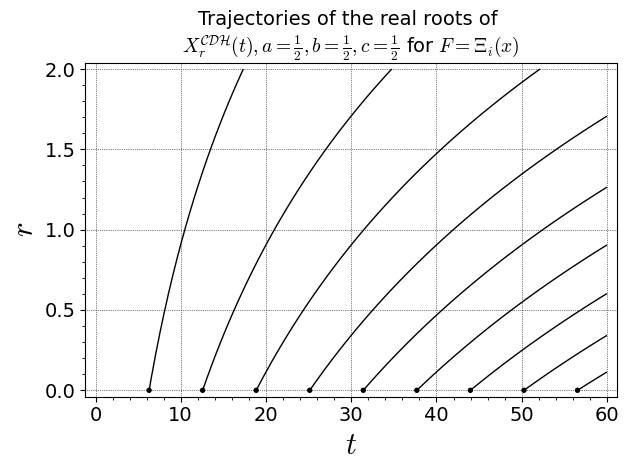

In [12]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z1=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("ContDualHahnCoeffa12b12c12int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(x,a,b,c,n):
    f1=CCF(a,0)+I*CCF(x);f2=CCF(a,0)-I*CCF(x)
    hyp=CCF(1).hypergeometric([-n,f1,f2],[a+b,a+c])
    return hyp

def ContDualHahnFlow(t,r):
    sum=CCF(0)
    for n in range(50):
        h = 1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("0.5"),CCF("0.5"),CCF("0.5"),n)
    return real_part(sum);

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000000001");x0 = RDF(2*k*pi());
    while(y):
        hd = (ContDualHahnFlow(x0 + tr*100,tr) - ContDualHahnFlow(x0,tr))/(tr*100)
        h = ContDualHahnFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(2*pi()*k))/(tr) 
    return dzdr3

def B(x,a,b,c):
    return (a-I*x)*(b-I*x)*(c-I*x)/(2*I*x*(2*I*x-1))

def D(x,a,b,c):
    return (a+I*x)*(b+I*x)*(c+I*x)/(2*I*x*(2*I*x+1))

#closed form for sum of zeros around k-th zero
def ZS(k,c):
    zk =2*pi()*k
    return (-1)^k*zk*c^4*sin(pi()*k+c/2)/(pi()*k+c/2)     

#compute d/dr zk via formula
def verifyDDE(k):
    return B(2*pi()*k,0.5,0.5,0.5)*ZS(k,I) + D(2*pi()*k,0.5,0.5,0.5)*ZS(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xin(0.5i) = %3.16f (should be equal)." % (CoeffSum, ContDualHahnFlow(0.5*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),real_part(verifyDDE(3))))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(ContDualHahnFlow(60,0)-Xin(60)))

a1i=implicit_plot(lambda t,r:((RDF(ContDualHahnFlow(t,r)))),(t,0,60),(r,0,2),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{CDH}}_r(t), a=\frac{1}{2}, b=\frac{1}{2}, c=\frac{1}{2}$ for $F=\Xi_i(x)$',gridlines=True,plot_points=120)
show(a1i + z1,aspect_ratio='automatic')